In [8]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon

In [9]:
gdf = gpd.read_file("all_states_precincts_cname_neighbor_demo_OG_anomalous_fixNeighborVA_congVote.json")

In [95]:
gdf = gdf[gdf["State"] == "tx"]
c = list(gdf.columns)
c.remove("CName")
c.remove("geometry")
gdf.drop(columns=c, axis=1, inplace=True)

KeyError: 'State'

In [96]:
gdf.head()

,CName,geometry
2865,tx-angelina-1,"POLYGON ((-94.69174 31.36161, -94.69370 31.361..."
2866,tx-angelina-0010a,"POLYGON ((-94.69961 31.31899, -94.69990 31.319..."
2867,tx-angelina-0010b,"POLYGON ((-94.72763 31.32405, -94.72761 31.325..."
2868,tx-angelina-11,"POLYGON ((-94.48967 31.39893, -94.48947 31.398..."
2869,tx-angelina-011b,"POLYGON ((-94.56044 31.28230, -94.56086 31.281..."


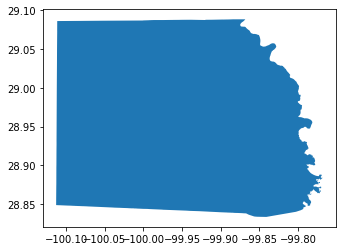

In [97]:
txzavala4 = gdf[gdf["CName"] == "tx-zavala-4"]
txzavala4.plot()

In [98]:
pt_lst = []
last_pt = 0 # -0.00001
for pt in txzavala4.iloc[-1]["geometry"].exterior.coords:
    pt_lst.append(pt)
    last_pt = pt
    # print(pt)

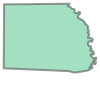

In [99]:
Polygon(pt_lst)

In [100]:
pt_lst[-1] = (pt_lst[-1][0], pt_lst[-1][1]-0.009)

In [101]:
p = Polygon(pt_lst)

In [102]:
p.is_valid

False

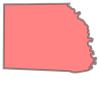

In [103]:
p

In [104]:
txzavala4.at[7275, "geometry"] = p

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [93]:
parsed